In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("anonymous_assessment.csv", index_col=None)
df.sample(5)

,cohort,grade
2,class4,100
67,class2,50
89,class1,10
37,class3,90
73,class1,100


In [3]:
df.groupby("cohort").describe().astype(int)

grade                                
       count mean std min 25%  50%  75%  max
cohort                                      
class1    25   83  27  10  80  100  100  100
class2    22   85  21  50  65  100  100  100
class3    22   80  24  30  62   95  100  100
class4    24   67  33  10  46   65  100  100

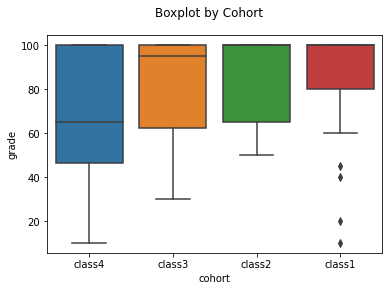

In [4]:
plt.suptitle("Boxplot by Cohort")
sns.boxplot(x="cohort", y="grade", data=df)
plt.show()

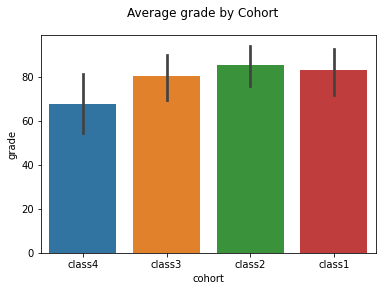

In [5]:
plt.suptitle("Average grade by Cohort")
sns.barplot(x="cohort", y="grade", data=df)
plt.show()

<AxesSubplot:ylabel='Count'>

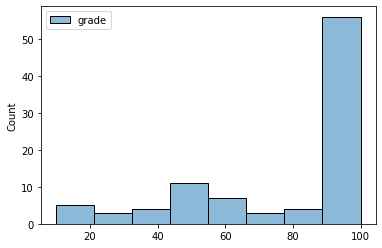

In [6]:
sns.histplot(data=df)

<AxesSubplot:>

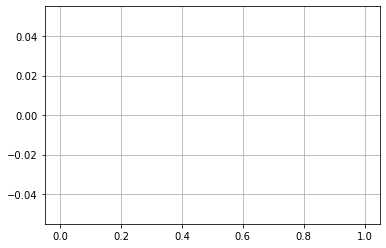

In [7]:
df[df.cohort == "jemison"].grade.hist()

<AxesSubplot:>

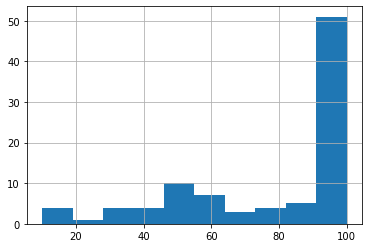

In [8]:
df[~(df.cohort == "jemison")].grade.hist()

In [9]:
import scipy.stats as stats


In [10]:
# Is the average grade from class4 different from the population?
t, p = stats.ttest_1samp(df[df.cohort == "class4"].grade, df.grade.mean())
p

0.10260313530111537

In [11]:
# Is the average grade from class4 different from non-class4 groups?
t, p = stats.ttest_ind(df[df.cohort == "class4"].grade, df[df.cohort != "class4"].grade, equal_var=False)
p

0.043635948339645715

In [12]:
class4 = df[df.cohort == "class4"]
class4[class4.grade < 70].shape[0] / class4.shape[0]

0.5

array([[<AxesSubplot:title={'center':'grade'}>]], dtype=object)

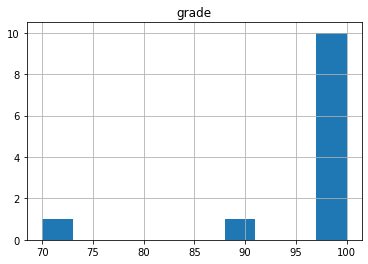

In [13]:
class4[class4.grade >= 70].hist()

array([[<AxesSubplot:title={'center':'grade'}>]], dtype=object)

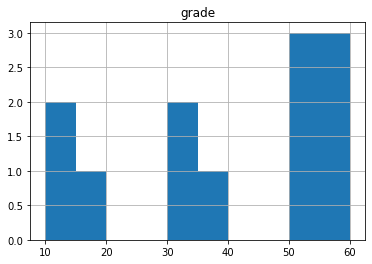

In [14]:
class4[class4.grade < 70].hist()